# Chi-squared Quadtree Tutorial

In this tutorial, we map the reduced $\chi^2$ values for a two-parameter fit using the `Chi2QuadTree` submodule in `astroQTpy`.

Quick way to constrain your model parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Define a model

To keep things simple for now, let's just consider a linear model.

In [2]:
def linear_model(x, params):
    """simple linear function that takes two parameters.
    
    """
    a, b = params # unpack parameters
    
    # equation for a line
    y = a * x + b
    
    return y

### Create a mock data set

In [3]:
# set parameters
a_truth = -1.7
b_truth = 12.8
sigma = 1.1
N_data = 120

In [4]:
# define domain
x_data = np.linspace(0, 10, N_data)

# generate fake data
y_data = linear_model(x_data, (a_truth, b_truth))
y_data += np.random.normal(0, sigma, N_data)  # add noise
data = np.stack((x_data, y_data))

# Gaussian weights
weights = np.full(N_data, 1/sigma**2)

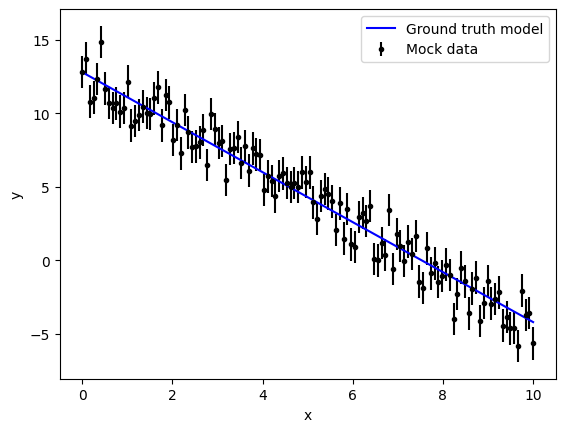

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(*data, yerr=sigma, fmt='k.', label='Mock data')
ax.plot(x_data, linear_model(x_data, (a_truth, b_truth)), 'b-', label='Ground truth model')
ax.legend()

plt.show()

### Explore $\chi^2$ space with a quadtree

In [6]:
from astroqtpy.quadtree import Chi2QuadTree

In [7]:
chi2_tree = Chi2QuadTree(-20, 20, -10, 30,
                         data,
                         linear_model,
                         weights=weights,
                         split_threshold=0.1,
                         N_proc=1,
                         max_depth=7,
                         max_chi2=12,
                         filename_points='./tutorial_outputs/chi2tree_points.txt',
                         filename_nodes='./tutorial_outputs/chi2tree_nodes.txt'
                        )

In [8]:
chi2_tree.run_quadtree()

Attempting to load previous results...
   202 nodes found, starting from previous checkpoint...
DONE! :)


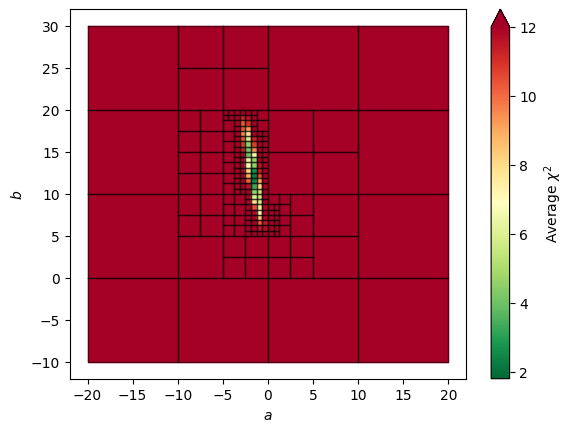

In [9]:
# make figure
fig, ax = plt.subplots()
quadtree_map = chi2_tree.draw_tree(ax, vmax=12)
plt.colorbar(quadtree_map, ax=ax, label='Average $\chi^2$', extend='max')
ax.set_xlabel("$a$")
ax.set_ylabel("$b$"); 

### Zoom in to refine

In [10]:
chi2_tree = Chi2QuadTree(-5, 1, 5, 20,
                         data,
                         linear_model,
                         weights=weights,
                         split_threshold=0.1,
                         N_proc=1,
                         max_depth=7,
                         max_chi2=12,
                         filename_points='./tutorial_outputs/chi2tree_fine_points.txt',
                         filename_nodes='./tutorial_outputs/chi2tree_fine_nodes.txt'
                        )

In [11]:
chi2_tree.run_quadtree()

Attempting to load previous results...
   1015 nodes found, starting from previous checkpoint...
DONE! :)


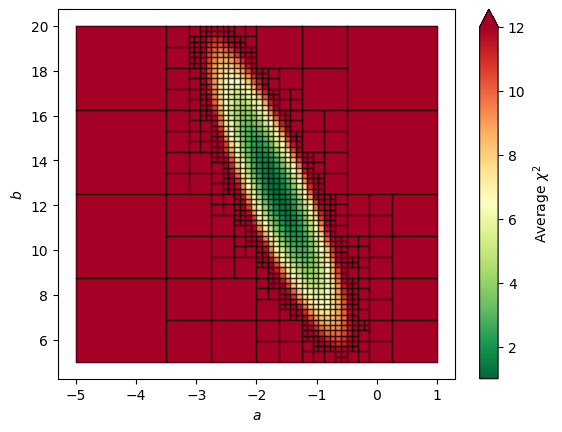

In [12]:
# make figure
fig, ax = plt.subplots()
quadtree_map = chi2_tree.draw_tree(ax, vmax=12)
plt.colorbar(quadtree_map, ax=ax, label='Average $\chi^2$', extend='max')
ax.set_xlabel("$a$")
ax.set_ylabel("$b$"); 

In [13]:
best_point = chi2_tree.get_chi2_min()
a_best = best_point.x
b_best = best_point.y

print(best_point)

QuadPoint(_x=-1.65345, _y=12.57653, _value=1.2291080360843236)


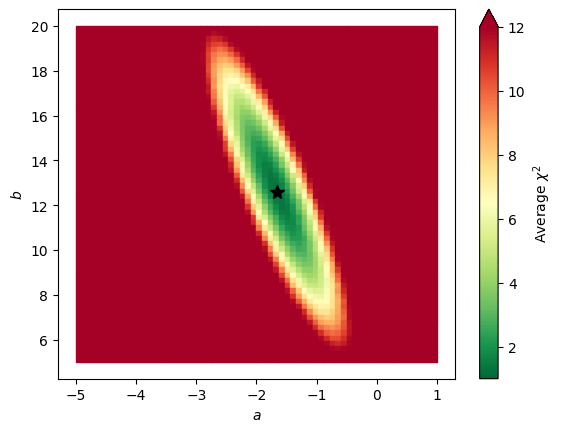

In [14]:
fig, ax = plt.subplots()
quadtree_map = chi2_tree.draw_tree(ax, show_lines=False, vmax=12)
plt.colorbar(quadtree_map, ax=ax, label='Average $\chi^2$', extend='max')
ax.plot(a_best, b_best, 'k*', ms=10)
ax.set_xlabel("$a$")
ax.set_ylabel("$b$"); 

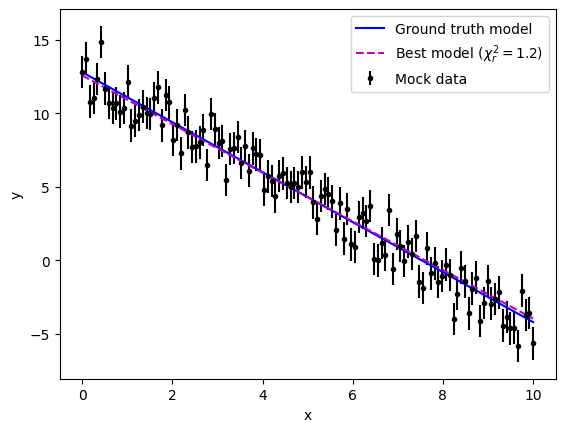

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(*data, yerr=sigma, fmt='k.', label='Mock data')
ax.plot(x_data, linear_model(x_data, (a_truth, b_truth)), 'b-', label='Ground truth model')
ax.plot(x_data, linear_model(x_data, (a_best, b_best)), 'm--', label='Best model ($\chi_r^2 = {:.1f}$)'.format(best_point.value))
ax.legend()

plt.show()